In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
checkpoints = ["00500", "05000", "10000", "15000", "20000", "25000", "30000", "35000", "40000", "45000", "50000"]
likelihoods_all = []
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_gsm8k_llama7B_full3/checkpoint_{checkpoint}/hf_model/"
    likelihoods = np.load(os.path.join(model_path, "trainpts_answer_log_probs_mean_all2.npy"))
    # likelihoods = likelihoods*train_question_lens
    likelihoods = np.e ** likelihoods
    likelihoods_all.append(likelihoods)
    print(likelihoods.mean())
likelihoods_all = np.array(likelihoods_all)

0.5986104
0.6795229
0.7026185
0.7123671
0.7132159
0.7182645
0.724342
0.70159554
0.715343
0.72587574
0.7170329


In [41]:
base_likelihoods = np.load(os.path.join("base_model_perplexities", "GSM8k_trainpts_answer_log_probs_mean_all2.npy"))
base_likelihoods = np.e ** base_likelihoods

Text(0.5, 1.0, 'Finetuning data')

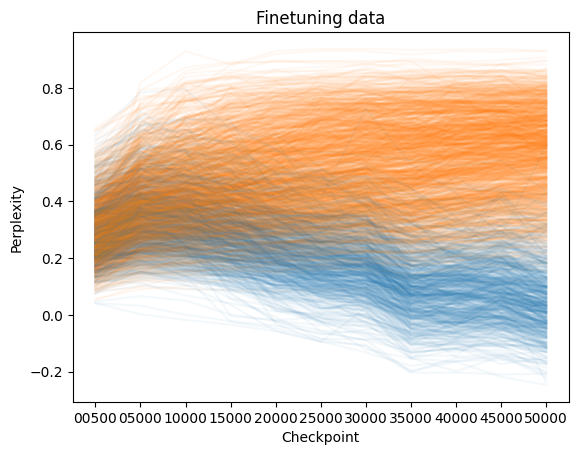

In [61]:
for i in range(2000):
    if likelihoods_all[-1, i] > likelihoods_all[0, i]:
        plt.plot(likelihoods_all[:, i], c = "C1", alpha = 0.05)
    else:
        plt.plot(likelihoods_all[:, i], c = "C0", alpha = 0.05)

plt.xlabel("Checkpoint")
plt.xticks(range(len(checkpoints)), checkpoints)
plt.ylabel("Perplexity")
plt.title("Finetuning data")

Text(0.5, 1.0, 'Finetuning data')

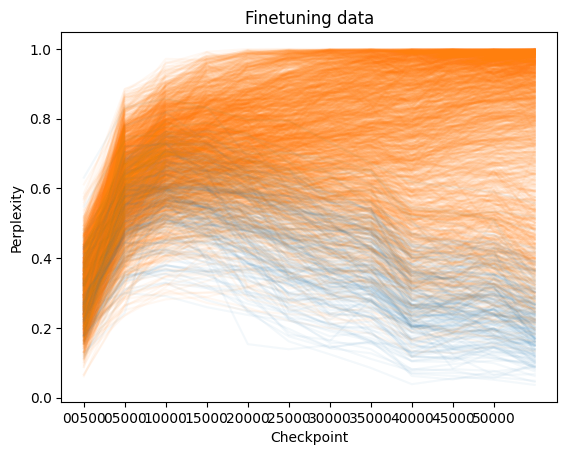

In [62]:
likelihoods_all2 = np.concatenate([base_likelihoods[None, :], likelihoods_all, ])

for i in range(2000):
    if likelihoods_all2[-1, i] > likelihoods_all2[0, i]:
        plt.plot(likelihoods_all2[:, i], c = "C1", alpha = 0.05)
    else:
        plt.plot(likelihoods_all2[:, i], c = "C0", alpha = 0.05)

plt.xlabel("Checkpoint")
plt.xticks(range(len(checkpoints)), checkpoints)
plt.ylabel("Perplexity")
plt.title("Finetuning data")

In [66]:
answer_types_all = np.load("ckpts/sft_gsm8k_llama7B_full3/checkpoint_10000/hf_model/train_answer_types_all100.npy")
num_correct_generations = (answer_types_all==0).sum(axis=-1)/answer_types_all.shape[-1]

answer_types_all2 = np.load("llama7B_GSM8k_train_answer_types_all100.npy")
num_correct_generations2 = (answer_types_all2==0).sum(axis=-1)/answer_types_all2.shape[-1]

answer_types_all4 = np.load("ckpts/sft_gsm8k_llama7B_full3/checkpoint_00500/hf_model/train2000_answer_types_16.npy")
num_correct_generations4 = (answer_types_all4==0).sum(axis=-1)/answer_types_all4.shape[-1]

answer_types_all5 = np.load("ckpts/sft_gsm8k_llama7B_full3/checkpoint_50000/hf_model/train2000_answer_types_16.npy")
num_correct_generations5 = (answer_types_all5==0).sum(axis=-1)/answer_types_all5.shape[-1]

In [4]:
checkpoints = ["00500", "05000", "10000", "15000", "20000", "45000", "50000"]
num_correct_all = []
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_gsm8k_llama7B_full3/checkpoint_{checkpoint}/hf_model/"        
    num_correct = (np.load(os.path.join(model_path, "train_answer_types_16.npy"))==0).mean(axis=-1)
    num_correct_all.append(num_correct)
num_correct_all = np.array(num_correct_all)
num_correct_all = np.mean(num_correct_all, axis=0)

(array([3514., 1160.,  754.,  533.,  420.,  381.,  275.,  230.,  162.,
          44.]),
 array([0.        , 0.09732143, 0.19464286, 0.29196429, 0.38928571,
        0.48660714, 0.58392857, 0.68125   , 0.77857143, 0.87589286,
        0.97321429]),
 <BarContainer object of 10 artists>)

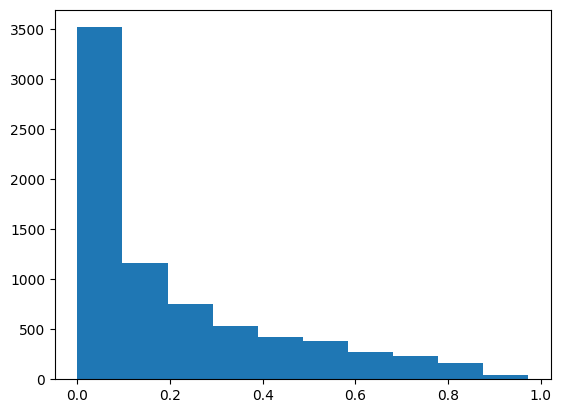

In [6]:
plt.hist(num_correct_all)

In [9]:
np.percentile(num_correct_all, 75)

0.32142857142857145

In [11]:
(num_correct_all>0).mean()

0.9096748293857888

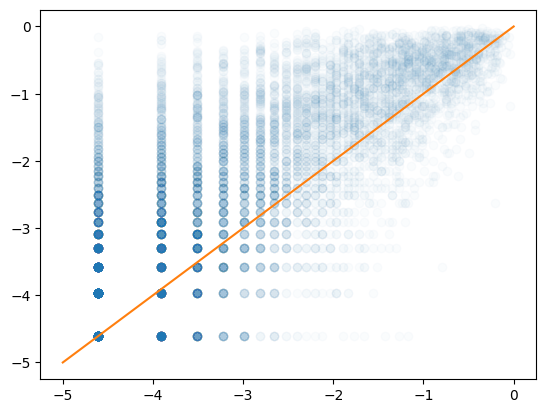

In [97]:
plt.scatter(np.log((num_correct_generations2+0.01)), np.log((num_correct_all)/16+0.01), c = "C0", alpha = 0.02)
plt.plot([-5, 0], [-5, 0], c = "C1")


<ErrorbarContainer object of 3 artists>

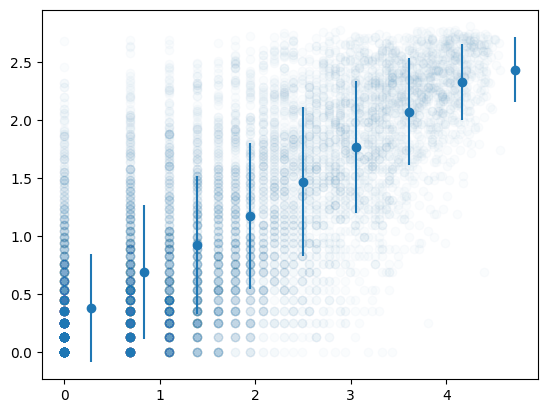

In [93]:
plt.scatter(np.log(num_correct_generations2*100+1), np.log(num_correct_all+1), c = "C0", alpha = 0.02)

x_bins = np.linspace(0, 5, 10)

y_means = []
y_stds = []

for x_bin in range(len(x_bins)-1):
    mask = (np.log(num_correct_generations2*100+1) >= x_bins[x_bin]) & (np.log(num_correct_generations2*100+1) < x_bins[x_bin+1])
    y_means.append(np.mean(np.log(num_correct_all+1)[mask]))
    y_stds.append(np.std(np.log(num_correct_all+1)[mask]))
    
plt.errorbar((x_bins[1:]+x_bins[:-1])/2, y_means, yerr = y_stds, fmt = "o", c = "C0")

In [89]:
y_means

[-inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 -inf,
 2.025818069843626,
 2.281568532582641]

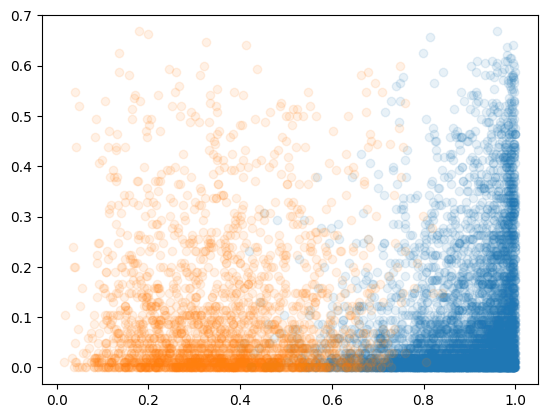

In [75]:
idxs = np.where(likelihoods_all[10]>likelihoods_all[0])[0]

plt.scatter(likelihoods_all[10,][idxs], np.log(num_correct_generations2[idxs]+1), c = "C0", alpha = 0.1)

idxs = np.where(likelihoods_all[10]<=likelihoods_all[0])[0]

plt.scatter(likelihoods_all[10,][idxs],  np.log(num_correct_generations2[idxs]+1), c = "C1", alpha = 0.1)

Text(0, 0.5, 'Fraction of correct generations')

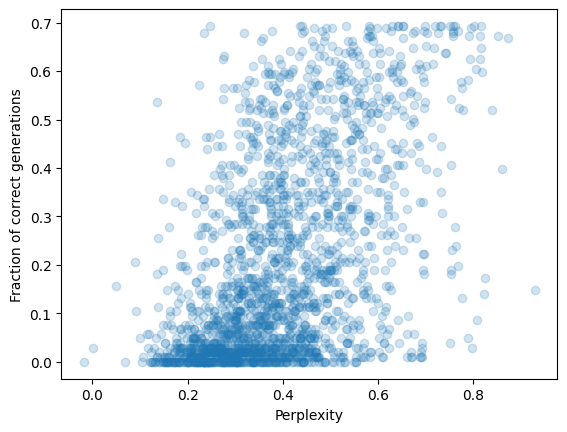

In [60]:
plt.scatter(likelihoods_all[2, :2000]-base_likelihoods[:2000], np.log(num_correct_generations[:2000]+1), c = "C0", alpha = 0.2)
plt.xlabel("Perplexity")
plt.ylabel("Fraction of correct generations")

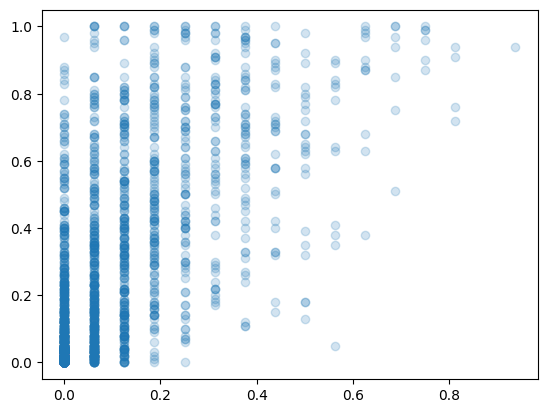

In [28]:
plt.scatter( num_correct_generations4[:2000], num_correct_generations3[:2000], c = "C0", alpha = 0.2)